In [1]:
import os
import pickle
import textblob
import warnings
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
from rich import print
import tensorflow as tf
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

2023-09-12 19:30:13.526685: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
warnings.simplefilter("ignore")
sns.set()

In [3]:
files = glob('dataset splitup/dataset2/*')
print(f'Total csv: {len(files)}')
print()
for i,j in enumerate(files):
    print(f'{i+1:>3}. {j}')

Total csv: 10

1. dataset splitup/dataset2/IEA-EV-dataEV_salesHistoricalCars.csv

2. dataset splitup/dataset2/car details v4.csv

3. dataset splitup/dataset2/EV_CARS _INDIA.csv

4. dataset splitup/dataset2/India_Electric_Vehicle_Market_1671628312425_1.csv

5. dataset splitup/dataset2/2-wheeler-EV-bikewale.csv

6. dataset splitup/dataset2/CAR DETAILS FROM CAR DEKHO.csv

7. dataset splitup/dataset2/Electric Car.csv

8. dataset splitup/dataset2/RS_Session_255_AU_749.C.csv

9. dataset splitup/dataset2/cars.csv

10. dataset splitup/dataset2/FEV data.csv

# IEA-EV-dataEV_salesHistoricalCars.csv
## Data Analysis

In [4]:
print(files[0])
df1 = pd.read_csv(files[0])
df1.head()

dataset splitup/dataset2/IEA-EV-dataEV_salesHistoricalCars.csv

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00046
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.00000


In [5]:
df1.isna().sum().sum()

0

In [6]:
df1.region.unique()

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'China', 'Denmark', 'EU27', 'Europe', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'India', 'Israel', 'Italy',
       'Japan', 'Korea', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
       'Other Europe', 'Poland', 'Portugal', 'Rest of the world',
       'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Turkiye',
       'United Kingdom', 'USA', 'World'], dtype=object)

In [7]:
df1_1 = df1[df1.region == 'India'].reset_index(drop=True)
df1_1

,region,category,parameter,mode,powertrain,year,unit,value
0,India,Historical,EV sales share,Cars,EV,2010,percent,0.021000
1,India,Historical,EV stock,Cars,BEV,2010,Vehicles,880.000000
2,India,Historical,EV sales,Cars,BEV,2010,Vehicles,450.000000
3,India,Historical,Oil displacement Mbd,Cars,EV,2010,Milion barrels per day,0.000016
4,India,Historical,"Oil displacement, million lge",Cars,EV,2010,"Oil displacement, million lge",0.910000
...,...,...,...,...,...,...,...,...
85,India,Historical,EV stock,Cars,BEV,2022,Vehicles,72000.000000
86,India,Historical,Oil displacement Mbd,Cars,EV,2022,Milion barrels per day,0.001000
87,India,Historical,"Oil displacement, million lge",Cars,EV,2022,"Oil displacement, million lge",57.000000
88,India,Historical,EV stock share,Cars,EV,2022,percent,0.160000


In [8]:
df1_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      90 non-null     object 
 1   category    90 non-null     object 
 2   parameter   90 non-null     object 
 3   mode        90 non-null     object 
 4   powertrain  90 non-null     object 
 5   year        90 non-null     int64  
 6   unit        90 non-null     object 
 7   value       90 non-null     float64
dtypes: float64(1), int64(1), object(6)
memory usage: 5.8+ KB


In [9]:
for i in df1_1.columns:
    print(f'{i}:\n{df1_1[i].unique()}')

region:
['India']

category:
['Historical']

parameter:
['EV sales share' 'EV stock' 'EV sales' 'Oil displacement Mbd'
 'Oil displacement, million lge' 'EV stock share' 'Electricity demand']

mode:
['Cars']

powertrain:
['EV' 'BEV' 'PHEV']

year:
[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]

unit:
['percent' 'Vehicles' 'Milion barrels per day'
 'Oil displacement, million lge' 'GWh']

value:
[2.09999997e-02 8.80000000e+02 4.50000000e+02 1.60000000e-05
 9.10000026e-01 5.20000001e-03 7.00000022e-03 3.09999996e-05
 1.79999995e+00 1.30000000e+03 1.40000000e+03 5.60000017e-02
 7.19999988e-03 1.90000000e+02 2.80000000e+03 3.19999999e-05
 1.89999998e+00 1.30000003e-02 1.20000001e-02 3.70000016e-05
 2.09999990e+00 2.90000000e+03 4.10000000e+02 1.60000008e-02
 3.79999988e-02 1.00000000e+03 3.40000000e+03 4.99999987e-05
 2.90000010e+00 1.49999997e-02 5.90000018e-05 3.40000010e+00
 4.40000000e+03 1.70000009e-02 2.60000005e-02 7.30000000e+02
 4.80000000e+03 6.80000012e-05 3.90000010e+00 8.19999987e-05
 4.69999981e+00 7.00000000e+03 9.20000000e+02 3.09999995e-02
 2.99999993e-02 7.90000000e+03 9.30000024e-05 5.30000019e+00
 2.19999999e-02 2.30000000e-02 9.99999975e-05 5.80000019e+00
 8.60000000e+03 7.00000000e+00 6.80000000e+02 2.40000002e-02
 8.20000004e-03 5.09999990e-02 1.29999995e-01 5.00000000e+01
 3.10000000e+03 4.30000000e+01 1.20000000e+04 1.30000000e-04
 7.69999981e+00 5.90000004e-02 3.19999992e-04 1.80000000e+01
 2.30000000e+04 1.00000000e+02 4.00000006e-01 1.19999997e-01
 1.50000000e+00 1.20000000e+02 4.80000000e+04 2.30000000e+01
 7.20000000e+04 1.00000005e-03 5.70000000e+01 1.59999996e-01
 2.10000000e+02]

In [10]:
df1_1.columns

Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')

In [11]:
df1_2 = df1_1[['parameter', 'powertrain', 
               'year', 'unit', 'value']]
df1_2

,parameter,powertrain,year,unit,value
0,EV sales share,EV,2010,percent,0.021000
1,EV stock,BEV,2010,Vehicles,880.000000
2,EV sales,BEV,2010,Vehicles,450.000000
3,Oil displacement Mbd,EV,2010,Milion barrels per day,0.000016
4,"Oil displacement, million lge",EV,2010,"Oil displacement, million lge",0.910000
...,...,...,...,...,...
85,EV stock,BEV,2022,Vehicles,72000.000000
86,Oil displacement Mbd,EV,2022,Milion barrels per day,0.001000
87,"Oil displacement, million lge",EV,2022,"Oil displacement, million lge",57.000000
88,EV stock share,EV,2022,percent,0.160000


In [12]:
df1_3 = df1_2[['parameter', 'year', 'value']].groupby(['parameter', 'year']).sum()
df1_3

value
parameter                     year        
EV sales                      2010   450.0
                              2011  1400.0
                              2012   190.0
                              2013   410.0
                              2014  1000.0
...                                    ...
Oil displacement, million lge 2018     5.3
                              2019     5.8
                              2020     7.7
                              2021    18.0
                              2022    57.0

[82 rows x 1 columns]

In [13]:
df1_2.parameter.unique()

array(['EV sales share', 'EV stock', 'EV sales', 'Oil displacement Mbd',
       'Oil displacement, million lge', 'EV stock share',
       'Electricity demand'], dtype=object)

In [14]:
df1_3.loc['EV sales share']

,value
year,
2010,0.0210
2011,0.0560
2012,0.0072
2013,0.0160
2014,0.0380
2015,0.0170
2016,0.0260
2017,0.0310
2018,0.0300


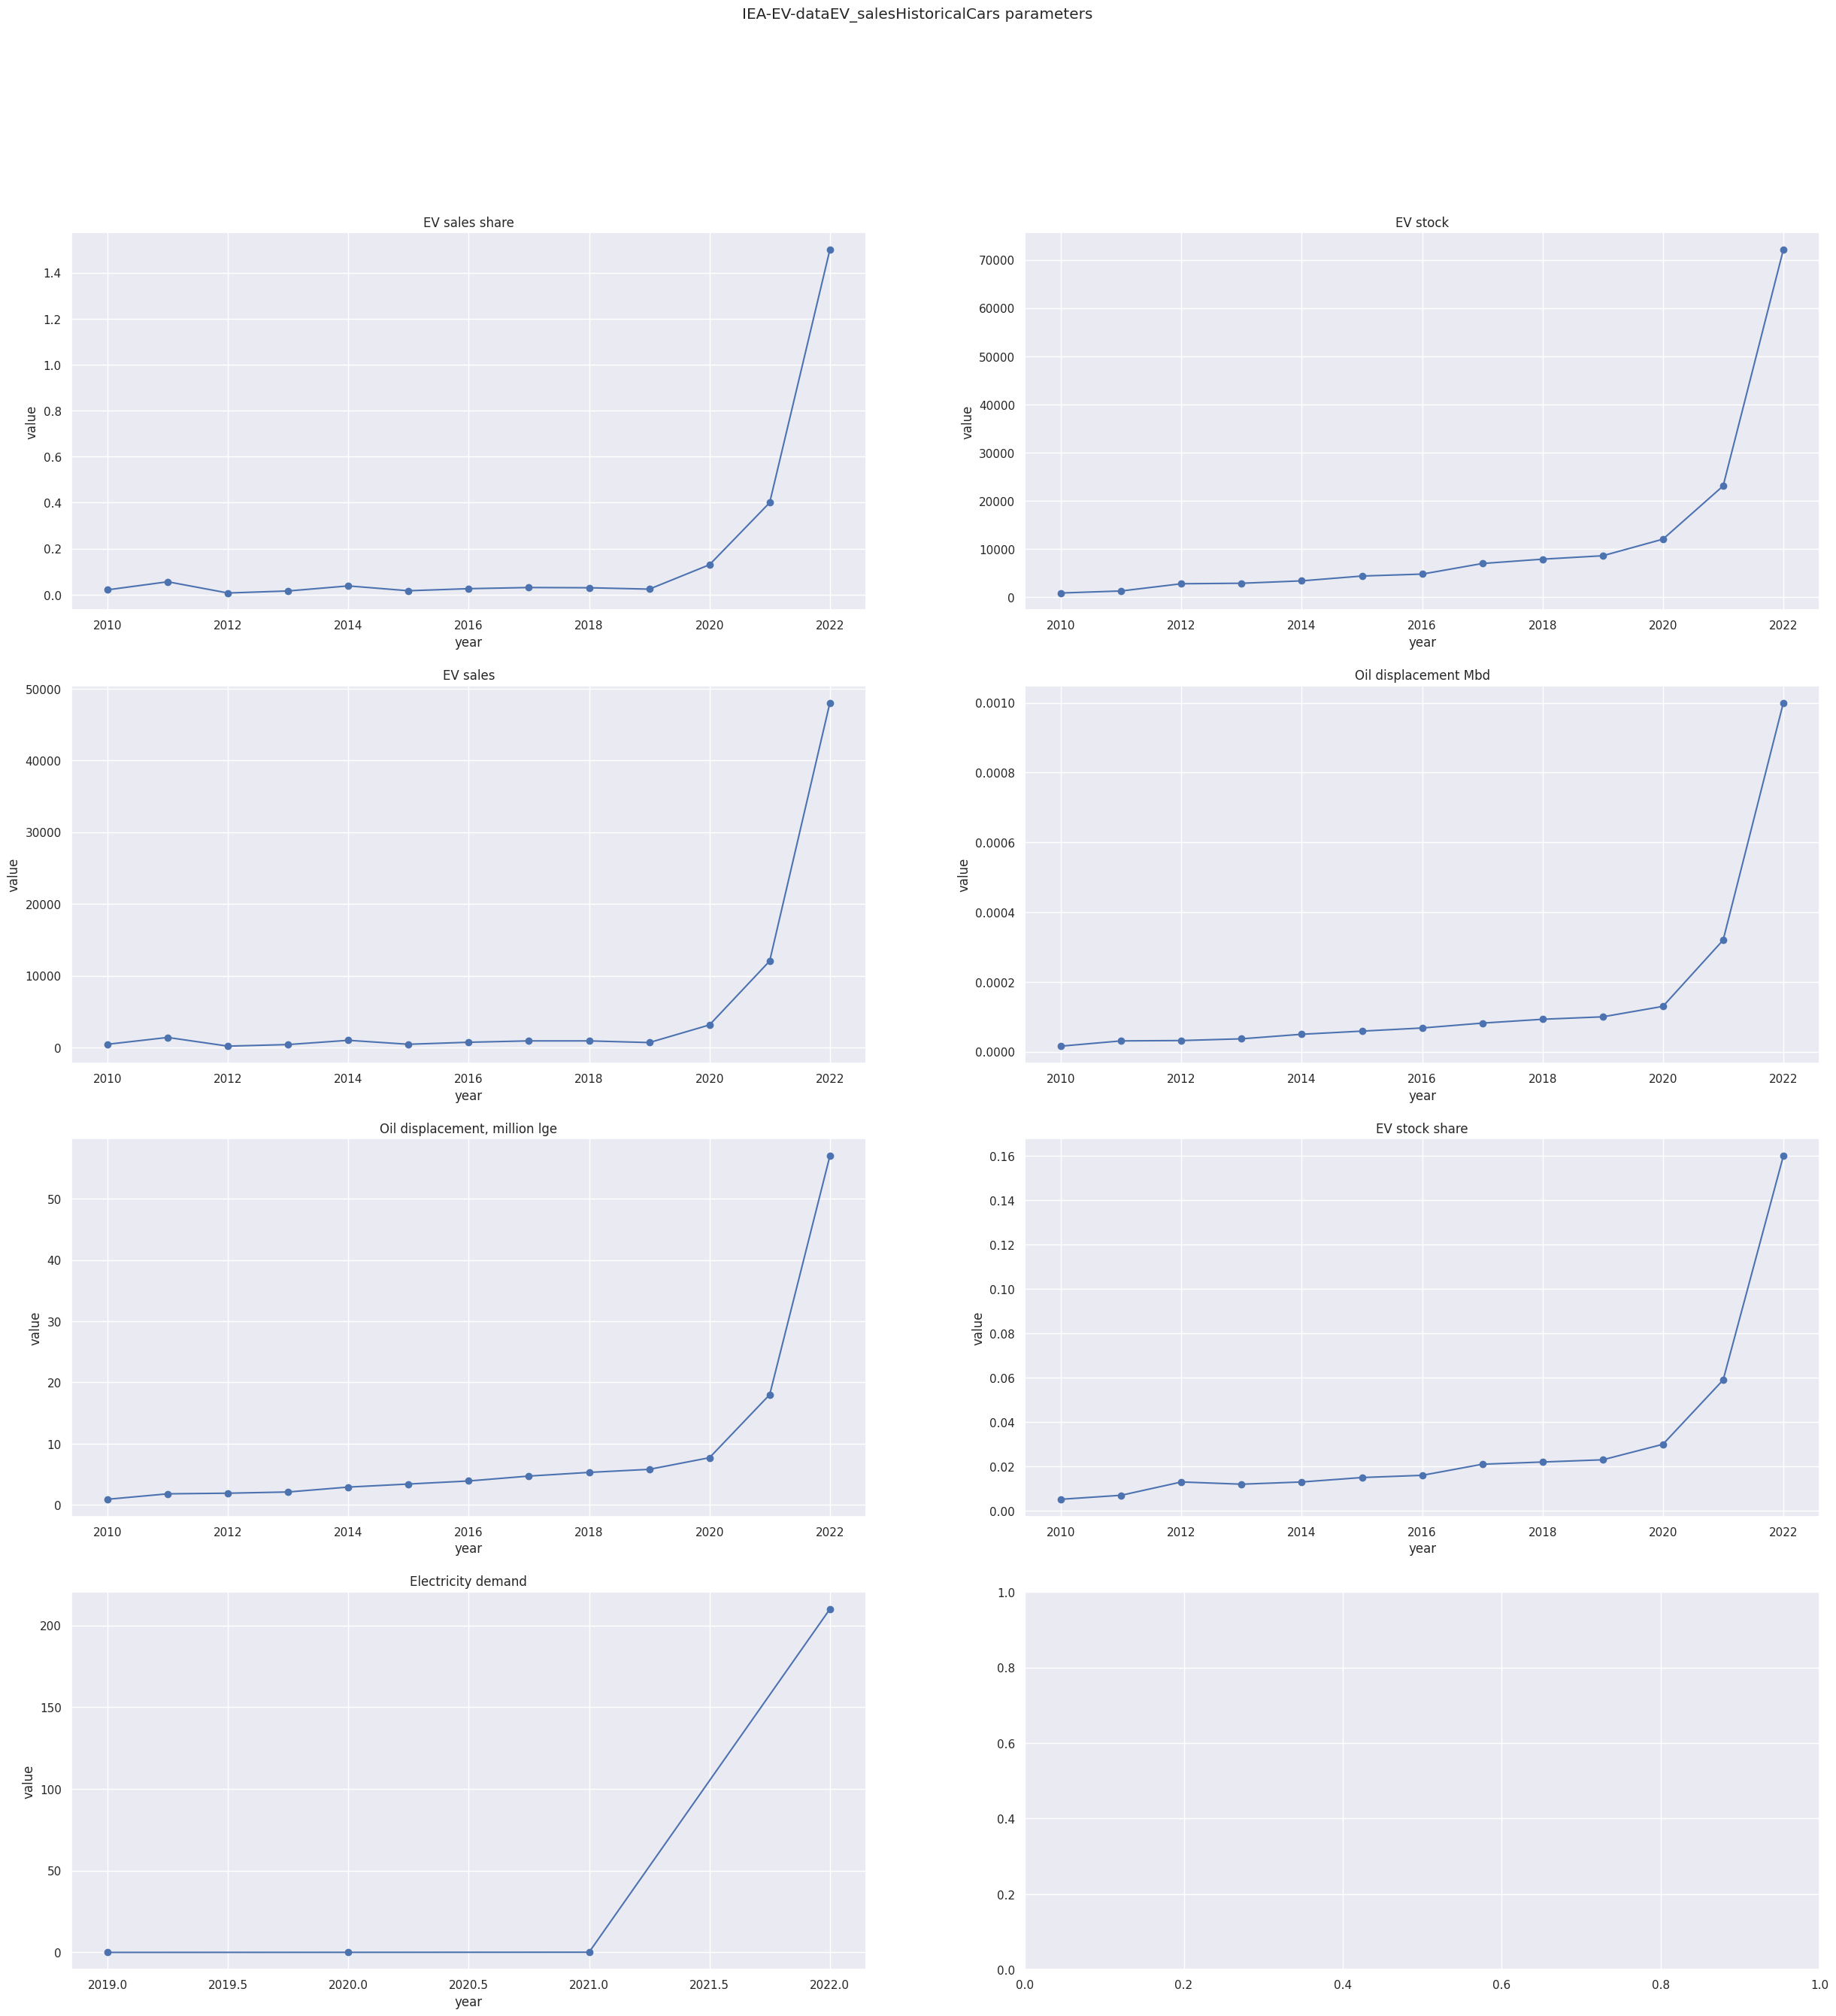

In [15]:
fig, axs = plt.subplots(4, 2, figsize=(30, 30))
axs = axs.flatten()
parameters = df1_2.parameter.unique()
for ax, parameter in zip(axs, parameters):
    temp = df1_3.loc[parameter]
    ax.plot(temp.index, temp.value, '-o')
    ax.set_title(parameter)
    ax.set_xlabel('year')
    ax.set_ylabel('value')
plt.suptitle('IEA-EV-dataEV_salesHistoricalCars parameters')
plt.show()

- From 2020, EV market become more popular
- EV usage is raising exponentially
- So next few years EV demand becomes more high

In [16]:
df1_4 = df1_2[['powertrain', 'year', 'value']].groupby(['powertrain', 'year']).sum()
df1_4

value
powertrain year               
BEV        2010    1330.000000
           2011    2700.000000
           2012    2990.000000
           2013    3310.000000
           2014    4400.000000
           2015    4850.000000
           2016    5530.000000
           2017    7920.000000
           2018    8820.000000
           2019    9280.000000
           2020   15100.000000
           2021   35000.000000
           2022  120000.000000
EV         2010       0.936216
           2011       1.863031
           2012       1.920232
           2013       2.128037
           2014       2.951050
           2015       3.432059
           2016       3.942068
           2017       4.752082
           2018       5.352093
           2019       5.855300
           2020       7.911130
           2021      18.579320
           2022     268.661000
PHEV       2019      14.000000
           2020      93.000000
           2021     150.000000
           2022     143.000000

In [17]:
df1_2.powertrain.unique()

array(['EV', 'BEV', 'PHEV'], dtype=object)

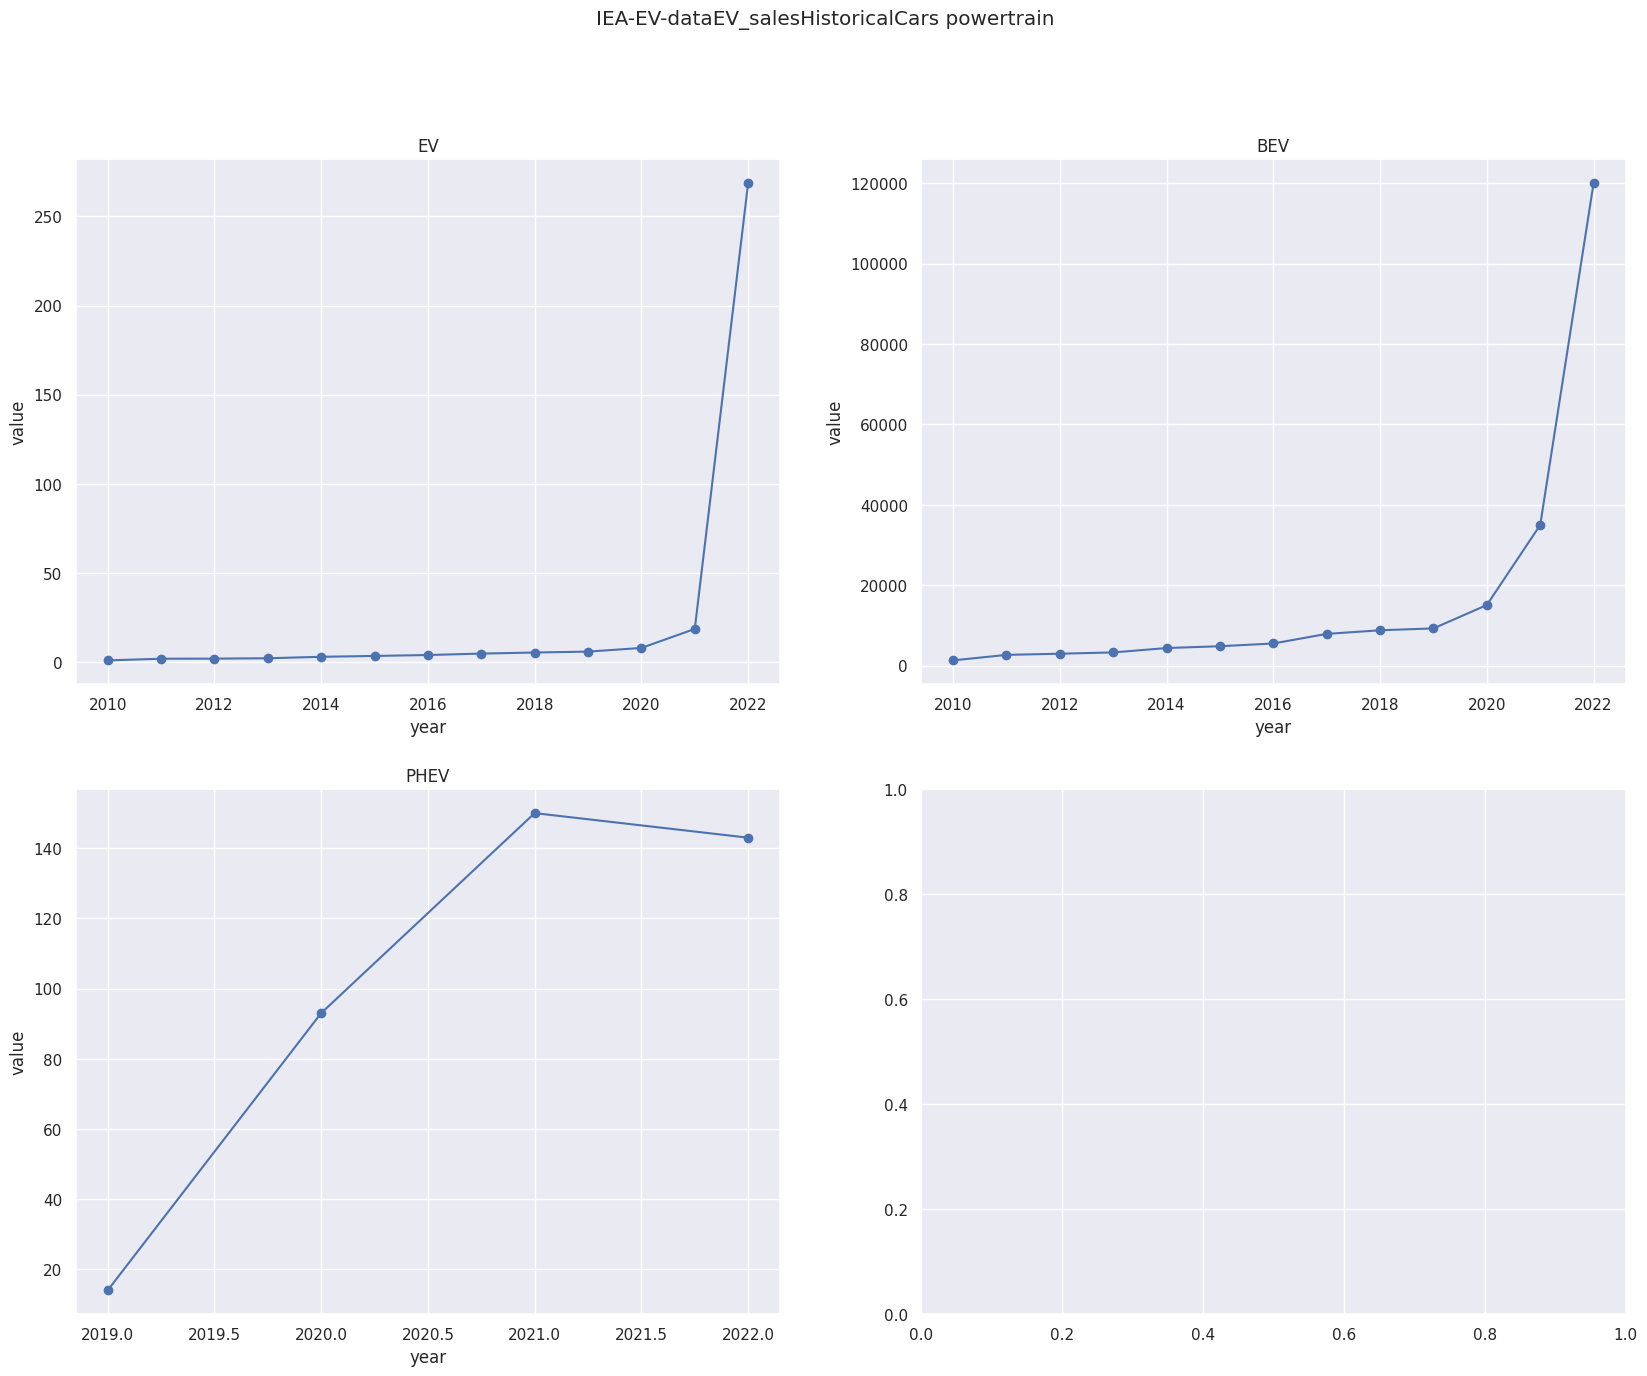

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
axs = axs.flatten()
powertrains = df1_2.powertrain.unique()
for ax, powertrain in zip(axs, powertrains):
    temp = df1_4.loc[powertrain]
    ax.plot(temp.index, temp.value, '-o')
    ax.set_title(powertrain)
    ax.set_xlabel('year')
    ax.set_ylabel('value')
plt.suptitle('IEA-EV-dataEV_salesHistoricalCars powertrain')
plt.show()

- **Plug-in hybrid**: graph decreasing
- **Battery Electric Vehicle**: graph increasing

> So  **Battery Electric Vehicle** become so popular and demand in future.

## PCA

In [19]:
df1_2.head(3)

,parameter,powertrain,year,unit,value
0,EV sales share,EV,2010,percent,0.021
1,EV stock,BEV,2010,Vehicles,880.000
2,EV sales,BEV,2010,Vehicles,450.000


In [20]:
label_encoders = [LabelEncoder() for _ in range(5)]

df1_5 = df1_2

for le, column in zip(label_encoders, df1_5.columns):
    df1_5[column] = le.fit_transform(df1_5[column])

standard_scaler = StandardScaler()

df1_5 = standard_scaler.fit_transform(df1_5)
df1_5[:5]

array([[-0.82939897,  0.3441236 , -1.72493763,  1.10633195, -0.79151715],
       [-0.34781247, -1.3764944 , -1.72493763,  0.24050695,  0.97967648],
       [-1.31098547, -1.3764944 , -1.72493763,  0.24050695,  0.85007694],
       [ 1.09694702,  0.3441236 , -1.72493763, -1.49114306, -1.74191373],
       [ 1.57853352,  0.3441236 , -1.72493763, -0.62531806, -0.14351948]])

In [21]:
pca = PCA(n_components=5)
df1_5_pca = pca.fit_transform(df1_5)
df1_5_pca[:5]

array([[-0.41553146, -1.49569507, -1.7523969 ,  0.14098876,  0.36285047],
       [-1.41256057, -1.82895667,  0.64922413, -0.3126372 ,  0.38611647],
       [-1.90161371, -1.74635176,  0.29787407,  0.38521236,  0.68286696],
       [ 2.37523363, -1.85688826,  0.05582255,  0.55523102,  0.39208201],
       [ 1.42291418, -1.59399548,  0.36340348, -1.00892195,  0.53078013]])

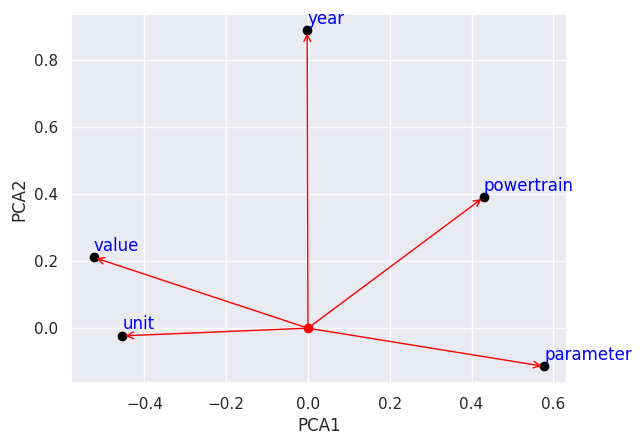

In [22]:
def pca_plot(pca, df, x_axis=0, y_axis=1, scale=1):
    plt.scatter(pca.components_[x_axis]*scale, pca.components_[y_axis]*scale, color='black')
    for x,y,name in zip(pca.components_[x_axis]*scale, pca.components_[y_axis]*scale, df.columns):
        plt.text(x, y+0.02, name, color='blue')
        plt.annotate('', (x,y), (0,0), arrowprops=dict(arrowstyle='->', color='red'))
    plt.scatter(0, 0, c='red')
    plt.xlabel(f'PCA{x_axis+1}')
    plt.ylabel(f'PCA{y_axis+1}')
    plt.show()

pca_plot(pca, df1_2)

# car details v4.csv

In [23]:
print(files[1])
df2 = pd.read_csv(files[1])
df2

dataset splitup/dataset2/car details v4.csv

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [24]:
df2.isna().sum().sum()

745

In [25]:
df2 = df2.dropna()

for i in df2.columns:
    print(f'{i}:\n{df2[i].unique()}')

Make:
['Honda' 'Maruti Suzuki' 'Hyundai' 'Toyota' 'BMW' 'Skoda' 'Nissan'
 'Renault' 'Tata' 'Volkswagen' 'Ford' 'Mercedes-Benz' 'Audi' 'Mahindra'
 'MG' 'Jeep' 'Porsche' 'Kia' 'Land Rover' 'Volvo' 'Maserati' 'Jaguar'
 'Isuzu' 'MINI' 'Ferrari' 'Mitsubishi' 'Datsun' 'Chevrolet' 'Ssangyong'
 'Fiat' 'Rolls-Royce' 'Lexus']

Model:
['Amaze 1.2 VX i-VTEC' 'Swift DZire VDI' 'i10 Magna 1.2 Kappa2' 'Glanza G'
 'Innova 2.4 VX 7 STR [2016-2020]' 'Ciaz ZXi' 'X1 xDrive20d M Sport'
 'Octavia 1.8 TSI Style Plus AT [2017]' 'Terrano XL (D)'
 'Elite i20 Sportz 1.2' 'Kwid 1.0 RXT [2016-2019]'
 'Ciaz Alpha Hybrid 1.5 AT [2018-2020]' 'Harrier XZ [2019-2020]'
 'Polo GT TSI' 'Celerio ZXi AMT [2019-2020]' 'Alto 800 LXi (O)'
 'Baleno Alpha Automatic' 'Wagon R ZXi 1.2 AMT' 'Creta 1.6 E Petrol'
 'S-Presso VXi AMT' 'Vento Comfortline Petrol AT'
 'Santro Sportz AMT [2018-2020]' 'Venue SX 1.0 (O) Petrol [2019-2020]'
 'Alto LXi CNG' 'Ritz Zxi BS-IV' 'Creta 1.6 SX Plus Petrol' 'Brio V MT'
 'Elite i20 Asta 1.2' 'WR-V VX MT Petrol' 'Venue SX 1.0 Turbo iMT'
 'Creta 1.6 SX Plus AT' 'Ecosport Titanium+ 1.0L EcoBoost'
 'Santro GL (CNG)' 'Tiago Revotron XE [2016-2019]' 'Tigor Revotorq XT'
 'Innova 2.4 G 8 STR [2016-2017]' 'GLC 220 d Progressive'
 'Creta SX 1.6 CRDi (O)' 'M-Class ML 250 CDI' 'Corolla Altis VL AT Petrol'
 'A4 2.0 TDI (177bhp) Premium Plus' 'SLK-Class SLK 200 K'
 'Thar CRDe 4x4 AC' 'Baleno Delta 1.2' 'Celerio VXi AMT' 'Ciaz VDi SHVS'
 'Ciaz VXi' 'Creta SX Plus 1.6 AT CRDI' 'Creta SX Plus 1.6  Petrol'
 'Kwid 1.0 RXT AMT Opt' 'Hector Sharp 2.0 Diesel [2019-2020]'
 'Tiago Revotron XZA [2017-2019]' 'Innova 2.5 GX BS IV 7 STR'
 'X3 xDrive 20d Luxury Line [2018-2020]'
 'Compass Limited Plus 2.0 Diesel 4x4 AT' 'Scorpio SLE BS-IV' 'Brio S MT'
 '3-Series 320i Luxury Line' 'City V Petrol [2017-2019]'
 'Polo Highline1.2L (D)' 'Vitara Brezza ZXi Plus' 'Eeco 7 STR [2019-2020]'
 'Grand i10 Asta AT 1.2 Kappa VTVT [2013-2016]' 'X3 xDrive20d'
 'Fortuner 2.8 4x2 AT [2016-2020]' 'Civic 1.8S MT' 'Swift ZXi Plus AMT'
 'Elite i20 Sportz 1.5 MT Diesel' 'A3 35 TDI Technology + Sunroof'
 'City V CVT Petrol [2017-2019]' 'Figo Duratorq Diesel Titanium 1.4'
 'Jazz VX Petrol' 'Polo Highline1.2L (P)' 'Amaze 1.5 SX i-DTEC'
 'Camry 2.5L AT' 'Thar LX 4-STR Hard Top Petrol AT'
 'C-Class 250 CDI Elegance' 'Q3 35 TDI quattro Premium Plus'
 'Baleno Sigma 1.2' 'X1 sDrive20d xLine' 'Baleno Zeta 1.2'
 'Vento Comfortline Petrol' 'C-Class 220 BlueEfficiency' 'Camry Hybrid'
 'DZire VXi' 'Terrano XV D THP 110 PS' 'Wagon R LXI CNG'
 'Vitara Brezza LDi (O) [2016-2018]' 'Cayenne Coupe Platinum Edition'
 'C-Class Cabriolet C 300' 'Elite i20 Magna 1.2' 'Verna 1.6 VTVT SX'
 'Amaze 1.2 SX i-VTEC' 'Corolla Altis 1.8 G' 'Elite i20 Sportz 1.2 (O)'
 'A6 2.0 TDI Premium' 'XUV300 W8 (O) 1.5 Diesel' 'Swift ZDi Plus'
 'Thar LX 4-STR Hard Top Petrol MT' 'City 1.5 S MT'
 'E-Class E 250 CDI Avantgarde' 'Fortuner 3.0 4x2 AT'
 'Zest XM 75 PS Diesel' 'Rapid Ambition 1.6 MPI AT Plus' 'Alto 800 Lxi'
 'Ertiga VDi' 'Figo Duratorq Diesel ZXI 1.4' 'Harrier XZ Plus'
 'Elite i20 Asta (O) 1.0 Turbo DCT' 'Swift DZire VXI'
 'Grand i10 Sportz 1.2 Kappa VTVT [2013-2016]'
 'Creta SX (O) 1.4 Turbo 7 DCT Dual Tone [2022-2022]'
 'Q2 Premium Plus I 40 TFSI quattro' 'Q7 45 TDI Premium Plus'
 'Verna Fluidic 1.6 CRDi SX' 'Wagon R VXI' 'Scorpio 2.6 Turbo 7 Str'
 'Grand i10 Magna 1.2 Kappa VTVT [2013-2016]' 'Q5 45 TFSI Premium Plus'
 'Duster RXS 1.5 Petrol MT' 'Creta SX 1.6 AT Petrol'
 'Compass Limited (O) 2.0 Diesel [2017-2020]'
 'Verna EX 1.6 CRDi [2017-2018]' 'i20 Magna 1.2' 'A6 35 TDI Matrix'
 'Marazzo M2 8 STR' 'Seltos HTX Plus 1.5 Diesel [2020-2021]'
 'Baleno Alpha 1.2' 'E-Class E 220d Expression [2019-2019]'
 'Ertiga ZDI + SHVS' 'Verna Fluidic 1.6 VTVT SX' 'Discovery Sport S'
 'GLE 250 d' 'Xcent S 1.2 (O)' 'S-Class Maybach S 500'
 'Astor Sharp 1.5 CVT' 'CR-V 2.4 AT' 'Duster 85 PS RxL'
 'Grand i10 Sportz (O) 1.2 Kappa VTVT [2017-2018]' 'City V'
 'C-Class C 200 Avantgarde' 'Elite i20 Asta 1.4 (O) CRDi'
 'Fabia Elegance 1.6 MPI' 'Rapid 1.5 TDI CR Ambition Plus AT'
 'Sonet GTX Plus 1.0 DCT [2020-2021]' 'XUV500 W11 AT'
 '3-Series 320d Luxury Line' 'GLA 200 CDI Sport' 'A6 35 TDI Premium'
 'Scorpio VLX 2WD BS-IV' 'Fortuner 3.0 4x4 MT'
 'Ecosport Titanium+ 1.5L TDCi' 'Q7 3.0 TDI quattro Premium Plus'
 'C-Class C 250 d' 'S-Presso VXi' 'Scorpio S5 2WD 7 ST

Price:
[  505000   450000   220000   799000  1950000   675000  2650000  1390000
   575000   591000   459999  1075000  1695000   944999   569000   449000
   894999   699000   740000   470000   765000   589000   999000   370000
   325000  1175000   351000   551000   819999   990000   925000   535000
   145000   409000   490000  1900000  3850000  1125000  2300000  1095000
  1575000  2400000   525000   625000   605000   412000   511000  1150000
   885000  1611000   475000   865000  3800000  2475000   400000   440000
  2800000   645000   365000  1044999   515000   455000  1800000  3499000
   190000   775000   825000  2250000   299000   570000   385000   350000
  2345000  1650000  1100000  2900000   545000  2990000   615000   890000
   430000  1599000   691000   650000   415000   669000 16200000  5100000
   750000   445000   493000   611000  1325000  3900000  1299000   580000
   375000  1400000   425000   250000   235000  3050000  2145000  1245000
   549000   484999   200000  1875000  2950000  4900000  1050000   345000
   550000  3350000  5651000   655000  4500000  6500000  4550000 11500000
  1475000  1764999   245000  2225000   560000   225000   499000  1055000
  2048999  2775000  1450000   600000  1675000  2450000  1165000  1780000
   295000   495000   975000  1350000  3200000  1250000  5600000  1221000
  1300000   950000  2682000   286000   340000  1485000  3650000   715000
  2485000  3600000  7200000  2395000  1775000  1580000   869000  5850000
  9000000  3550000  3500000  2425000  2200000   520000   390000   540000
  7500000   850000  1085000   319000  1725000  1060000   690000  4200000
 12500000  1750000   395000  2790000  5350000  1825000  4459000   790000
  2100000   270000   335000  1000000   960000  3299000  1798999   725000
  1090000   900000  3400000  2251000  9300000  1595000  1200000  1525000
  2675000  7900000   195000  2499000  1097000  1375000   745000  2175000
   500000   310000  4250000  1625000   480000   590000   561000  1700000
  1495000  3300000   875000   969999  1789999  1964999  4000000   355000
  2375000   275000   465000   695000  3210000   269000  5950000  1490000
  1550000  3195000   741000  7350000   595000   160000   800000   315000
  1850000   610000  1995000  1748999   640000   779000  8500000  2500000
   249000   980000   789000   770000   840000 18500000  7780000   620000
  5200000  1998999  2725000  1489000   685000  1121000  4390000   360000
   565000  9390000  3785000  6400000 35000000  2150000    49000  1321000
  3450000   379000   240000  4275000   229999   300000  8300000  1685000
   210000  6900000  1600000   265000   710000   720000  2799000 13000000
  2149000   860000  1513000   234000   320000  5975000  1025000   630000
   700000   661000  1195000  3199000  7100000 22000000  3250000   399000
  1275000   585000   795000   649000   599000  2980000  6975000  5400000
  3700000  1835000  2540000  2550000   529000  2600000  2390000  9400000
   994999  4700000  3375000   665000  5500000  2140000  1080000   628000
  3750000  4950000  1290000  1190000  5375000  1138000  1225000  2598000
   434999   910000  2590000   254999   598000  2850000  6225000  1500000
   436000  4300000  1911000  8600000  2000000   426999  9200000  1035000
  3675000  3950000  3775000   949000   509999  4150000  1698999  9500000
  6800000   380000  8190000   869999   785000   420000   642000   290000
   721000  1515000  7000000  4100000  6875000  1115000   761000   609000
  5175000  5800000  6700000  1791000   422000  1295000  7475000   280000
  1240000   328000   409999   680000   951000  5300000   801000  3975000
  4400000   198000  1549000  1679000  1689999  5900000  2750000  5250000
  1070000  1530000  1598000  1975000 18000000  1839000  1425000   760000
  5995000   735000  1848999  2039999  3100000  4375000  3000000  6600000
  2785000  1199000  2385000  2180000  8000000  4325000   155000  4590000
  2190000  4800000   421000   899000  3875000   935000  1340000   215000
  2700000  6150000   369000  2199000  1251000  4749

Year:
[2017 2014 2011 2019 2018 2015 2016 2020 2013 2009 2010 2021 2012 2006
 2022 2007 2008 1988]

Kilometer:
[  87150   75000   67000   37500   69000   73315   56000   85000   20281
   22541   30672   20856   41417   11471    3583   21365   30777   60125
    2169   60240   13772   27464   47377   23086   36313   39276   47752
   27963   24013   66000   28000   72000   27069   43000   71000   45600
   60000  105101   45000   34105   68397   65000   27469   41058   51330
   45969   66602   57983   11183   46301   34867   43634    9512   11293
   78000   50374   15900   64000   24000   40310   69700   74073   73000
  130000   40500   49013   64983   92270  110000   47000   10000   51500
   35000   61518   34000   36058   88000   98112   58000   92355   16652
   76584   42500   70000    2766   68766   16339   63882   28732   51349
   61866   29401   98580    8000   31348   28851    8519   48000  143000
   39000   62000   82000   40910   10290   10530   61900   57402   57000
   87500   18000   10700   16282   72019   92170   55221   25000       1
   23500   68000   29096   61223   86000   87000   79287   48945   17000
   55000   38779    6000   46000   23103   27000    9576    1942  119300
   98000   61400   87693   31000   75210   15000   45350   68189   33000
   83000  211000   48600    5790   32000   65433   87230   38258   56881
   60514   71141   40937   37000   70200   64800   76345   40564   98500
   46807   81000   13716   89000   13000   38000   25500   44724   24549
   97000    7800   20000   13594   43037   26000  115000    8700   41736
   40000  160000   11000  117000   95000   76000  107000    8922   47800
   68758    7500   22402   12382   61000   90868   22010   75500   39586
   33647   57847   74000   57300   80852   75592   54420   39780   78301
  126535   37079   87200   51000   29999   84700    3383   42000   62500
   30229    9000   26600   29135   50965   11850   50623    1700   43260
   67738   14722   29000   60200  140000   23798   49000  102000   16000
   55700   80000  104814   75811    3813   64928   68500   41296   72567
    4295    8530   39394   17881   48409   61643   21000    1500   38985
   52000   29442   71800    5000   65555     600   86006   99000   21651
   84000   44000   49857   50000   36000    3800   35123    2670  124000
    9889   51145   82900   56843    9644   41624   82844   60444  125000
  112000   53300  157662   78900   95785   92000   39328   18625   10340
   47706   13400   44613    7000   23000   67580   16205   14000  114635
   29221   77000    5500    9500   17904   25275   67850  105000   55055
   22000   25704   55353   41526   29434   80251   42505   42200   57600
  128000   64120   82300   50197   44527   72400   82200    7900   79000
   72600   42313   90000   26200   14366  126000   71700  114000   58339
   72040    6200    6900    2500   19000    6400   54000   41441   48174
   62591   48650   52245   43297   44710   59267   52236   15530    2000
  103890   12000   93000   33828    4000   57654   41792   41000  107021
   57993   25914    4500   30183   73190   13120   56918   27657   30000
  111000   37600   81802   45915   22224   53848  104264   61159   57400
   13500   12400  121000   46721   41470  170000   73265   68818   12050
   24100  185000    1910   36978   18954   58200  117048   43290  150000
   42079  101347   36700  240000   76529   37959    1300   21696   58618
   85641   41669   37180   53512    4600   32963  101000   50500   80849
   19868   30858   56500   37003   53000  120000   44087   59000   48422
   76642  135000   14500   31552   35134   62125   64300   28600   69500
    8640    5750   44876   95610   53693   63000   53807   67546   37100
   89059   58146    3826    8499   61181    9232   42601  106223   39850
   96095   12768   12321   65100  118000   26807   53929   49580   15780
   50800    3500   31100    9400   15507  145000   47721   95315   11874
   51800  155000   45326   28079   15529   43200   29386   18105  125372
  100000   65001   42533   34400    8800   19700    2700   52890   72870
   48591   60888   20251   54200   51292   1924

Fuel Type:
['Petrol' 'Diesel' 'CNG' 'CNG + CNG' 'LPG' 'Hybrid' 'Petrol + CNG']

Transmission:
['Manual' 'Automatic']

Location:
['Pune' 'Ludhiana' 'Lucknow' 'Mangalore' 'Mumbai' 'Coimbatore' 'Bangalore'
 'Delhi' 'Raipur' 'Kanpur' 'Patna' 'Vadodara' 'Hyderabad' 'Yamunanagar'
 'Gurgaon' 'Jaipur' 'Deoghar' 'Agra' 'Goa' 'Warangal' 'Jalandhar' 'Noida'
 'Ahmedabad' 'Mohali' 'Ghaziabad' 'Kolkata' 'Zirakpur' 'Nagpur' 'Thane'
 'Faridabad' 'Ranchi' 'Chandigarh' 'Amritsar' 'Chennai' 'Navi Mumbai'
 'Udupi' 'Jamshedpur' 'Aurangabad' 'Rudrapur' 'Nashik' 'Varanasi' 'Salem'
 'Dehradun' 'Valsad' 'Haldwani' 'Dharwad' 'Surat' 'Indore' 'Karnal'
 'Panchkula' 'Mysore' 'Rohtak' 'Ambala Cantt' 'Samastipur' 'Panvel'
 'Purnea' 'Bhubaneswar' 'Kheda' 'Kollam' 'Meerut' 'Ernakulam' 'Kharar'
 'Mirzapur' 'Bhopal' 'Gorakhpur' 'Guwahati' 'Allahabad' 'Muzaffurpur'
 'Faizabad' 'Kota' 'Pimpri-Chinchwad' 'Dak. Kannada' 'Ranga Reddy'
 'Bulandshahar' 'Roorkee']

Color:
['Grey' 'White' 'Maroon' 'Red' 'Blue' 'Orange' 'Silver' 'Brown' 'Black'
 'Bronze' 'Gold' 'Beige' 'Green' 'Purple' 'Others' 'Yellow']

Owner:
['First' 'Second' 'Third' 'UnRegistered Car']

Seller Type:
['Corporate' 'Individual' 'Commercial Registration']

Engine:
['1198 cc' '1248 cc' '1197 cc' '2393 cc' '1373 cc' '1995 cc' '1798 cc'
 '1461 cc' '999 cc' '1462 cc' '1956 cc' '998 cc' '796 cc' '1591 cc'
 '1086 cc' '1199 cc' '1582 cc' '1047 cc' '2143 cc' '1968 cc' '1796 cc'
 '2498 cc' '2494 cc' '2179 cc' '1998 cc' '1497 cc' '1196 cc' '2755 cc'
 '1799 cc' '1493 cc' '1399 cc' '1498 cc' '1997 cc' '1598 cc' '2995 cc'
 '1991 cc' '2982 cc' '1353 cc' '1984 cc' '2967 cc' '2609 cc' '1950 cc'
 '1999 cc' '4663 cc' '2354 cc' '1396 cc' '2987 cc' '2993 cc' '2997 cc'
 '1336 cc' '4163 cc' '3496 cc' '799 cc' '2979 cc' '4806 cc' '2996 cc'
 '1061 cc' '2184 cc' '2999 cc' '3436 cc' '2925 cc' '1368 cc' '1797 cc'
 '1298 cc' '2694 cc' '1186 cc' '1364 cc' '3498 cc' '2497 cc' '3982 cc'
 '1120 cc' '2523 cc' '1988 cc' '3902 cc' '624 cc' '2477 cc' '3198 cc'
 '814 cc' '2953 cc' '1496 cc' '1499 cc' '1996 cc' '5461 cc' '1395 cc'
 '2835 cc' '2148 cc' '2696 cc' '1794 cc' '1969 cc' '6592 cc' '2199 cc'
 '1451 cc' '4951 cc' '1495 cc' '2487 cc' '2998 cc' '2198 cc' '2157 cc'
 '1595 cc' '936 cc' '1332 cc' '2400 cc' '793 cc' '995 cc']

Max Power:
['87 bhp @ 6000 rpm' '74 bhp @ 4000 rpm' '79 bhp @ 6000 rpm'
 '82 bhp @ 6000 rpm' '148 bhp @ 3400 rpm' '91 bhp @ 6000 rpm'
 '188 bhp @ 4000 rpm' '177 bhp @ 5100 rpm' '84 bhp @ 3750 rpm'
 '67 bhp @ 5500 rpm' '103 bhp @ 6000 rpm' '138 bhp @ 3750 rpm'
 '103 bhp @ 5000 rpm' '67 bhp @ 6000 rpm' '47 bhp @ 6000 rpm'
 '122 bhp @ 6400 rpm' '68 bhp @ 5500 rpm' '118 bhp @ 6000 rpm'
 '58 bhp @ 6000 rpm' '85 bhp @ 6000 rpm' '89 bhp @ 6000 rpm'
 '126 bhp @ 4000 rpm' '124 bhp @ 6000 rpm' '62 bhp @ 5500 rpm'
 '84 bhp @ 6000 rpm' '69 bhp @ 4000 rpm' '168 bhp @ 3000 rpm'
 '203 bhp @ 4200 rpm' '138 bhp @ 6400 rpm' '177 bhp @ 4200 rpm' '165@5500'
 '105 bhp @ 3800 rpm' '83 bhp @ 6000 rpm' '89 bhp @ 4000 rpm'
 '169 bhp @ 3750 rpm' '101 bhp @ 3600 rpm' '190 bhp @ 4000 rpm'
 '171 bhp @ 3750 rpm' '120 bhp @ 4000 rpm' '181 bhp @ 5000 rpm'
 '117 bhp @ 6600 rpm' '74 bhp @ 4200 rpm' '73 bhp @ 6000 rpm'
 '184 bhp @ 4000 rpm' '174 bhp @ 3400 rpm' '130 bhp @ 6300 rpm'
 '99 bhp @ 4000 rpm' '141 bhp @ 3500 rpm' '68 bhp @ 4000 rpm'
 '74 bhp @ 5400 rpm' '99 bhp @ 3600 rpm' '179 bhp @ 6000 rpm'
 '150 bhp @ 5000 rpm' '207@4200' '184 bhp @ 3500 rpm' '103 bhp @ 5250 rpm'
 '170 bhp @ 4200 rpm' '202 bhp @ 5700 rpm' '108 bhp @ 3900 rpm'
 '58 bhp @ 6200 rpm' '335 bhp @ 5300 rpm' '241 bhp @ 5500 rpm'
 '121 bhp @ 6300 rpm' '177 bhp @ 3750 rpm' '115 bhp @ 3750 rpm' '118@6600'
 '204 bhp @ 4200 rpm' '169 bhp @ 3600 rpm' '104 bhp @ 5250 rpm'
 '168 bhp @ 3750 rpm' '81 bhp @ 6000 rpm' '138 bhp @ 6000 rpm'
 '188 bhp @ 4200 rpm' '245 bhp @ 2910 rpm' '67 bhp @ 6200 rpm' '116@3800'
 '248 bhp @ 5000 rpm' '105 bhp @ 5600 rpm' '190 bhp @ 3800 rpm'
 '121 bhp @ 3500 rpm' '113 bhp @ 4000 rpm' '192 bhp @ 3800 rpm'
 '177 bhp @ 4000 rpm' '201 bhp @ 3800 rpm' '453 bhp @ 5250 rpm'
 '108 bhp @ 6000 rpm' '152@6000' '181 bhp @ 5500 rpm' '105 bhp @ 5250 rpm'
 '103 bhp @ 4400 rpm' '153 bhp @ 3750 rpm' '134 bhp @ 3600 rpm'
 '99 bhp @ 3750 rpm' '241 bhp @ 3800 rpm' '204 bhp @ 3800 rpm' '75@4000'
 '174 bhp @ 4200 rpm' '234@3800' '150 bhp @ 3500 rpm' '258 bhp @ 4000 rpm'
 '186 bhp @ 5600 rpm' '231@3800' '254 bhp @ 3600 rpm' '109 bhp @ 5000 rpm'
 '108 bhp @ 5000 rpm' '104 bhp @ 5200 rpm' '444 bhp @ 8250 rpm'
 '272 bhp @ 6000 rpm' '53 bhp @ 5678 rpm' '180 bhp @ 4000 rpm'
 '140 bhp @ 3750 rpm' '172 bhp @ 3400 rpm' '275 bhp @ 4000 rpm'
 '500 bhp @ 6500 rpm' '171@3600' '58 bhp @ 5500 rpm' '362 bhp @ 5500 rpm'
 '296 bhp @ 5500 rpm' '67@6200' '245 bhp @ 4400 rpm' '130 bhp @ 3750 rpm'
 '148 bhp @ 4000 rpm' '174 bhp @ 3600 rpm' '80@5200' '255 bhp @ 3400 rpm'
 '325 bhp @ 7400 rpm' '153 bhp @ 6200 rpm' '282 bhp @ 3600 rpm'
 '89 bhp @ 6200 rpm' '188 bhp @ 3500 rpm' '160 bhp @ 5500 rpm'
 '89 bhp @ 3750 rpm' '248 bhp @ 5200 rpm' '138 bhp @ 4000 rpm'
 '262 bhp @ 4000 rpm' '147 bhp @ 6500 rpm' '87@6000' '119 bhp @ 6600 rpm'
 '164 bhp @ 5200 rpm' '208 bhp @ 4300 rpm' '118 bhp @ 5500 rpm'
 '181 bhp @ 5800 rpm' '68 bhp @ 6000 rpm' '67 bhp @ 3800 rpm'
 '99 bhp @ 5000 rpm' '68 bhp @ 6200 rpm' '272 bhp @ 6300 rpm'
 '114 bhp @ 4000 rpm' '113 bhp @ 6300 rpm' '105 bhp @ 4400 rpm'
 '118 bhp @ 6600 rpm' '70 bhp @ 6250 rpm' '204@6100' '463 bhp @ 5250 rpm'
 '136 bhp @ 3200 rpm' '71 bhp @ 4000 rpm' '154 bhp @ 4000 rpm' '112 bhp @'
 '75 bhp @ 3200 rpm' '295 bhp @ 6500 rpm' '120@5500' '241 bhp @ 4200 rpm'
 '100 bhp @ 3750 rpm' '660 bhp @ 8000 rpm' '141 bhp @ 4000 rpm'
 '190 bhp @ 3500 rpm' '35@5250' '176 bhp @ 4000 rpm' '197 bhp @ 3000 rpm'
 '67 bhp @ 5000 rpm' '114 bhp @ 6300 rpm' '55 bhp @ 5500 rpm'
 '154 bhp @ 3200 rpm' '182 bhp @ 4000 rpm' '80 bhp @ 5600 rpm'
 '118 bhp @ 3750 rpm' '75 bhp @ 6200 rpm' '109 bhp @ 6300 rpm'
 '326 bhp @ 3600 rpm' '116 bhp @ 6600 rpm' '258 bhp @ 3600 rpm'
 '108 bhp @ 3750 rpm' '122@4000' '215 bhp @ 4000 rpm' '100 bhp @ 3600 rpm'
 '368 bhp @ 6300 rpm' '194 bhp @ 5800 rpm' '244 bhp @ 4000 rpm'
 '108 bhp @ 4000 rpm' '148 bhp @ 5000 rpm' '194 bhp @ 5500 rpm'
 '182 bhp @ 3500 rpm' '128 bhp @ 4000 rpm' '335 bhp @ 5200 rpm'
 '189 bhp @ 5000 rpm' '76 bhp @ 6000 rpm' '255 bhp @ 3600 rpm'
 '157 bhp 

Max Torque:
['109 Nm @ 4500 rpm' '190 Nm @ 2000 rpm' '112.7619 Nm @ 4000 rpm'
 '113 Nm @ 4200 rpm' '343 Nm @ 1400 rpm' '130 Nm @ 4000 rpm'
 '400 Nm @ 1750 rpm' '250 Nm @ 1250 rpm' '200 Nm @ 1900 rpm'
 '115 Nm @ 4000 rpm' '91 Nm @ 4250 rpm' '138 Nm @ 4400 rpm'
 '350 Nm @ 1750 rpm' '175 Nm @ 1500 rpm' '90 Nm @ 3500 rpm'
 '69 Nm @ 3500 rpm' '154 Nm @ 4850 rpm' '153 Nm @ 3800 rpm'
 '99 Nm @ 4500 rpm' '172 Nm @ 1500 rpm' '78 Nm @ 3500 rpm'
 '113 Nm @ 4500 rpm' '110 Nm @ 4800 rpm' '265 Nm @ 1900 rpm'
 '170 Nm @ 1400 rpm' '96 Nm @ 3000 rpm' '114 Nm @ 3500 rpm'
 '140 Nm @ 1800 rpm' '400 Nm @ 1400 rpm' '260 Nm @ 1500 rpm'
 '500 Nm @ 1600 rpm' '173 Nm @ 4000 rpm' '380 Nm @ 1750 rpm' '240@3000'
 '247 Nm @ 1800 rpm' '200 Nm @ 1750 rpm' '200 Nm @ 1200 rpm'
 '290 Nm @ 1800 rpm' '270 Nm @ 1350 rpm' '145 Nm @ 4600 rpm'
 '180 Nm @ 2000 rpm' '101 Nm @ 3000 rpm' '112 Nm @ 4000 rpm'
 '450 Nm @ 1600 rpm' '171.62 Nm @ 4300 rpm' '113 Nm @ 4400 rpm'
 '240 Nm @ 1500 rpm' '320 Nm @ 1750 rpm' '160 Nm @ 2000 rpm'
 '110 Nm @ 3750 rpm' '233 Nm @ 4100 rpm' '320 Nm @ 1500 rpm' '500@1600'
 '400 Nm @ 2800 rpm' '270 Nm @ 4500 rpm' '248 Nm @ 2250 rpm'
 '77 Nm @ 3500 rpm' '450 Nm @ 1340 rpm' '370 Nm @ 1300 rpm'
 '158 Nm @ 4200 rpm' '300 Nm @ 1500 rpm' '300 Nm @ 1250 rpm' '146@4600'
 '360 Nm @ 1400 rpm' '190 Nm @ 1750 rpm' '114 Nm @ 4000 rpm'
 '242 Nm @ 1500 rpm' '600 Nm @ 1500 rpm' '260 Nm @ 1900 rpm' '277@1700'
 '370 Nm @ 1600 rpm' '142 Nm @ 4000 rpm' '151 Nm @ 4850 rpm'
 '113.796 Nm @ 4000 rpm' '300 Nm @ 1750 rpm' '250 Nm @ 1500 rpm'
 '400 Nm @ 1600 rpm' '430 Nm @ 1750 rpm' '700 Nm @ 1800 rpm'
 '144 Nm @ 4400 rpm' '215@3600' '300 Nm @ 1200 rpm' '220 Nm @ 1500 rpm'
 '360 Nm @ 1750 rpm' '300 Nm @ 1600 rpm' '205 Nm @ 1750 rpm'
 '550 Nm @ 1750 rpm' '280 Nm @ 1800 rpm' '190@2000' '535@1600'
 '350 Nm @ 1500 rpm' '560 Nm @ 1500 rpm' '285 Nm @ 4000 rpm' '540@1600'
 '619 Nm @ 1600 rpm' '219.744 Nm @ 1500 rpm' '175 Nm @ 1750 rpm'
 '170 Nm @ 1750 rpm' '153 Nm @ 3750 rpm' '430 Nm @ 4000 rpm'
 '350 Nm @ 5000 rpm' '72 Nm @ 4386 rpm' '360 Nm @ 1200 rpm'
 '600 Nm @ 2000 rpm' '700 Nm @ 2250 rpm' '343@1400' '520 Nm @ 2000 rpm'
 '330 Nm @ 2800 rpm' '113 Nm @ 3300 rpm' '400 Nm @ 1500 rpm' '84@3500'
 '330 Nm @ 1600 rpm' '550 Nm @ 2750 rpm' '380 Nm @ 1800 rpm'
 '320 Nm @ 1700 rpm' '111@4000' '620 Nm @ 1600 rpm' '390 Nm @ 5600 rpm'
 '192 Nm @ 4000 rpm' '113 Nm @ 4000 rpm' '600 Nm @ 1600 rpm'
 '420 Nm @ 1750 rpm' '250 Nm @ 2500 rpm' '204 Nm @ 2000 rpm'
 '350 Nm @ 1450 rpm' '620 Nm @ 1500 rpm' '177 Nm @ 4700 rpm' '113@4500'
 '145 Nm @ 4300 rpm' '245 Nm @ 4000 rpm' '350 Nm @ 1600 rpm'
 '280 Nm @ 1600 rpm' '95 Nm @ 4000 rpm' '170 Nm @ 1800 rpm'
 '152 Nm @ 2200 rpm' '94 Nm @ 3500 rpm' '345 Nm @ 4500 rpm'
 '144 Nm @ 4500 rpm' '102 Nm @ 4000 rpm' '245@5000' '700 Nm @ 2000 rpm'
 '320 Nm @ 1600 rpm' '300 Nm @ 1400 rpm' '160 Nm @ 1500 rpm'
 '400 Nm @ 1700 rpm' '270 Nm @ 1750 rpm' '200 Nm @ 1400 rpm'
 '215 Nm @ 1750 rpm' '380 Nm @ 1950 rpm' '155 Nm @ 4200 rpm' '170@3500'
 '240 Nm @ 1600 rpm' '760 Nm @ 3000 rpm' '340 Nm @ 1750 rpm' '48@3000'
 '400 Nm @ 2000 rpm' '470 Nm @ 1750 rpm' '104 Nm @ 4000 rpm'
 '115 Nm @ 4200 rpm' '75 Nm @ 4000 rpm' '620 Nm @ 2000 rpm'
 '380 Nm @ 2500 rpm' '132 Nm @ 3000 rpm' '95 Nm @ 3000 rpm'
 '140 Nm @ 4400 rpm' '700 Nm @ 1200 rpm' '146 Nm @ 4800 rpm' '290@1800'
 '480 Nm @ 1500 rpm' '230 Nm @ 1500 rpm' '505 Nm @ 4400 rpm'
 '240 Nm @ 1850 rpm' '420 Nm @ 1600 rpm' '320 Nm @ 1650 rpm'
 '450 Nm @ 1750 rpm' '115 Nm @ 1500 rpm' '500 Nm @ 1370 rpm'
 '280 Nm @ 1350 rpm' '104 Nm @ 4400 rpm' '191 Nm @ 4500 rpm'
 '320 Nm @ 1400 rpm' '380 Nm @ 2000 rpm' '323@2000' '160 Nm @ 1750 rpm'
 '225 Nm @ 1500 rpm' '224 Nm @ 1500 rpm' '99.081 Nm @ 4500 rpm'
 '250 Nm @ 150 rpm' '292 Nm @ 2000 rpm' '500 Nm @ 1400 rpm' '410@2000'
 '200 Nm @ 2000 rpm' '150 Nm @ 4500 rpm' '380 Nm @ 2150 rpm'
 '450 Nm @ 3500 rpm' '110 Nm @ 4000 rpm' '365 Nm @ 1500 rpm'
 '170 Nm @ 2400 rpm' '350@2400' '402 Nm @ 3000 rpm' '480@1750'
 '259 Nm @ 1900 rpm' '320 Nm @ 1450 rpm' '205 Nm @ 1800 rpm'
 '85 Nm @ 3500 rpm' '1

Drivetrain:
['FWD' 'RWD' 'AWD']

Length:
[3990. 3995. 3585. 4735. 4490. 4439. 4670. 4331. 3985. 3679. 4598. 3971.
 3695. 3445. 3655. 4270. 3565. 4384. 3610. 3545. 3775. 3999. 3746. 3992.
 4656. 4804. 4620. 4701. 4082. 3920. 3600. 4655. 4585. 4657. 4395. 4430.
 4633. 4440. 3970. 3675. 3765. 4648. 4795. 4545. 3845. 4456. 3795. 3955.
 4825. 4596. 4385. 4454. 3599. 4931. 4686. 4375. 4540. 4915. 3840. 4420.
 4879. 4705. 4386. 3395. 4265. 4300. 4318. 5052. 4370. 4495. 4663. 4360.
 4933. 4315. 5063. 4296. 4600. 4819. 5453. 4323. 4630. 4000. 4417. 5089.
 3760. 4781. 4899. 4868. 4413. 3994. 4649. 3805. 5157. 4661. 3850. 5005.
 4846. 4695. 4702. 3827. 4731. 3520. 3620. 4788. 5130. 4936. 4491. 4475.
 5246. 3900. 4709. 4465. 4291. 4855. 4922. 4530. 3636. 4160. 4549. 4198.
 3993. 3998. 4371. 3884. 4861. 3715. 3991. 3515. 5226. 5462. 4097. 4445.
 4379. 4470. 4924. 4658. 4624. 4568. 4486. 4355. 4891. 3099. 4390. 4892.
 3785. 4424. 3495. 5219. 5060. 4726. 5207. 5120. 4985. 3429. 4999. 3821.
 4903. 4618. 5064. 4447. 3825. 4299. 4500. 4629. 5067. 4405. 4597. 4800.
 4755. 4425. 4659. 5247. 5076. 4854. 4762. 5091. 3595. 4841. 4939. 4688.
 3700. 3987. 4969. 5399. 3886. 4690. 4640. 4221. 4720. 4838. 4660. 4784.
 4635. 4696. 4250. 4975. 4526. 3982. 4935. 5252. 4986. 4752. 4225. 5569.
 4581. 5199. 5255. 5265. 4850. 5115. 4292. 4693. 4963. 3895. 4107. 3640.
 4950. 4882. 4869. 4689. 4988. 5140. 5151. 4708. 4570. 4644. 4953. 4918.
 4453. 3793. 4359. 4320. 4818. 4249.]

Width:
[1680. 1695. 1595. 1745. 1830. 1730. 1821. 1814. 1822. 1734. 1579. 1894.
 1682. 1600. 1515. 1620. 1780. 1520. 1699. 1645. 1770. 1490. 1765. 1525.
 1647. 1677. 1890. 2141. 1775. 1826. 1777. 1726. 1835. 1881. 1818. 1817.
 1811. 1790. 1475. 1660. 1855. 1750. 1735. 1796. 1694. 1825. 1820. 1831.
 2044. 1495. 1983. 1810. 1700. 1760. 1874. 1854. 1840. 1706. 1805. 1968.
 1898. 1729. 1710. 1866. 1800. 1860. 2069. 1899. 1809. 1642. 1804. 1690.
 1911. 1783. 2094. 2183. 1981. 1939. 1683. 1742. 2071. 2073. 2155. 1903.
 1934. 1967. 1868. 1852. 1850. 1827. 1900. 1722. 1965. 2004. 1748. 1842.
 1996. 1864. 1635. 1500. 2120. 1789. 1801. 1550. 2157. 2031. 1952. 1839.
 2003. 1785. 1815. 1902. 1788. 1926. 1560. 2220. 1727. 1869. 1813. 1970.
 1665. 2091. 1832. 2110. 1871. 1933. 1847. 1846. 1886. 1758. 1687. 2139.
 1948. 1880. 1845. 1915. 2080. 1865. 1923. 1670. 1995. 1918. 2173. 1795.
 2105. 1949. 1960. 1985. 1893. 1879. 1698. 2020. 1863. 1928. 2000. 1798.
 1891. 2008. 1704. 2010. 1755. 1715. 1764.]

Height:
[1505. 1555. 1550. 1510. 1795. 1485. 1612. 1476. 1671. 1478. 1706. 1469.
 1560. 1475. 1675. 1630. 1564. 1466. 1605. 1620. 1500. 1601. 1708. 1590.
 1535. 1537. 1639. 1665. 1796. 1427. 1297. 1930. 1760. 1678. 1640. 1975.
 1429. 1495. 1453. 1800. 1520. 1661. 1835. 1450. 1530. 1416. 1544. 1480.
 1844. 1447. 1608. 1545. 1515. 1700. 1676. 1409. 1455. 1627. 1474. 1850.
 1570. 1685. 1635. 1548. 1740. 1659. 1695. 1774. 1645. 1494. 1724. 1498.
 1650. 1710. 1442. 1522. 1647. 1785. 1737. 1995. 1458. 1464. 1471. 1607.
 1366. 1786. 1501. 1693. 1702. 1434. 1603. 1615. 1651. 1803. 1690. 1705.
 1840. 1460. 1791. 1479. 1304. 1660. 1435. 1496. 1922. 1745. 1470. 1855.
 1670. 1489. 1353. 1606. 1649. 1483. 1920. 1565. 1432. 1561. 1525. 1295.
 1772. 1839. 1644. 1213. 1672. 1719. 1652. 1595. 1467. 1837. 1481. 1826.
 1823. 1867. 1541. 1414. 1488. 1755. 1703. 1598. 1674. 1433. 1653. 1457.
 1780. 1477. 1900. 1281. 1448. 1446. 1473. 1776. 1538. 1468. 1658. 1572.
 1637. 1420. 1391. 1482. 1484. 1624. 1465. 1370. 1445. 1557. 1825. 1425.
 1895. 1621. 1696. 1532. 1490. 1817. 1845. 1402. 1443. 1880. 1848. 1901.
 1805. 1713. 1666. 1587. 1518. 1523. 1655. 1486. 1503.]

Seating Capacity:
[5. 7. 4. 8. 2. 6.]

Fuel Tank Capacity:
[ 35.   42.   37.   55.   43.   51.   50.   45.   28.   32.   60.   27.
  40.   52.   66.   70.   63.   67.   57.   48.   80.   64.   65.   75.
  59.   44.   93.   58.  100.   95.   90.   82.  104.   85.   56.   68.
  62.   66.5  47.   54.   78.   71.   15.  105.   41.   77.   92.   83.
  73.   82.5  60.9  67.5  81.   61.   38. ]

In [26]:
df2_1 = df2

label_encoders2 = [LabelEncoder() for _ in range(7)]

for column, le in zip(['Fuel Type', 'Transmission', 'Location', 
               'Color', 'Owner', 'Seller Type', 'Drivetrain'], label_encoders2):
    df2_1[column] = le.fit_transform(df2_1[column])
df2_1.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,5,1,56,7,0,1,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,1,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,2,1,40,14,1,2,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,1,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,5,1,39,8,0,2,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,1,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,5,1,41,12,0,2,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,1,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,2,1,45,7,0,2,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,2,4735.0,1830.0,1795.0,7.0,55.0


In [27]:
df2_1.Engine = df2_1.Engine.str.findall('\d+').apply(lambda x:x[0])

In [28]:
df2_1['Max Power'][df2_1['Max Power'].str.findall('[\d\.]+').apply(lambda x:len(x)!=2)]

456     112 bhp @
2014    112 bhp @
Name: Max Power, dtype: object

In [29]:
df2_1 = df2_1.drop([456, 2014])

In [30]:
df2_1['Max Power'] = df2_1['Max Power'].str.findall('[\d\.]+').apply(lambda x:float(x[0])/float(x[1]))

In [31]:
df2_1['Max Torque'][df2_1['Max Torque'].str.findall('[\d\.]+').apply(lambda x:len(x)!=2)]

Series([], Name: Max Torque, dtype: object)

In [32]:
df2_1['Max Torque'] = df2_1['Max Torque'].str.findall('[\d\.]+').apply(lambda x:float(x[0])*float(x[1]))

In [33]:
df2_2 = df2_1.select_dtypes(['int', 'float'])
df2_2.head()

,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,505000,2017,87150,5,1,56,7,0,1,0.014500,490500.0,1,3990.0,1680.0,1505.0,5.0,35.0
1,450000,2014,75000,2,1,40,14,1,2,0.018500,380000.0,1,3995.0,1695.0,1555.0,5.0,42.0
2,220000,2011,67000,5,1,39,8,0,2,0.013167,451047.6,1,3585.0,1595.0,1550.0,5.0,35.0
3,799000,2019,37500,5,1,41,12,0,2,0.013667,474600.0,1,3995.0,1745.0,1510.0,5.0,37.0
4,1950000,2018,69000,2,1,45,7,0,2,0.043529,480200.0,2,4735.0,1830.0,1795.0,7.0,55.0


In [34]:
df2_2 = df2_2[['Price', 'Year', 'Kilometer', 'Max Power', 'Max Torque', 'Length', 'Width', 'Height', 'Seating Capacity',
       'Fuel Tank Capacity']]

In [35]:
standard_scaler2 = StandardScaler()
df2_2_scaled = standard_scaler2.fit_transform(df2_2)
df2_2_scaled[:5]

array([[-0.50011059,  0.09023696,  0.57797468, -0.87218662, -0.1866376 ,
        -0.66860631, -0.66878537, -0.62377504, -0.36597911, -1.13530191],
       [-0.52277499, -0.86593434,  0.37134369, -0.63255151, -0.67775663,
        -0.65714619, -0.55461113, -0.25247093, -0.36597911, -0.67387522],
       [-0.61755339, -1.82210564,  0.23529036, -0.95206499, -0.36198443,
        -1.59687622, -1.31577274, -0.28960134, -0.36597911, -1.13530191],
       [-0.37895906,  0.7276845 , -0.26640627, -0.9221106 , -0.25730541,
        -0.65714619, -0.17403033, -0.58664463, -0.36597911, -1.00346571],
       [ 0.09534503,  0.40896073,  0.26930369,  0.86692993, -0.23241612,
         1.03895192,  0.47295703,  1.52978882,  2.11182519,  0.18306005]])

In [36]:
df2_2_scaled.shape

(1872, 10)

In [37]:
pca2 = PCA(n_components=10)
df2_2_scaled_pca = pca2.fit_transform(df2_2_scaled)
df2_2_scaled_pca[:5]

array([[-1.80222624, -0.21153337,  0.32693569,  0.55056516, -0.14770589,
         0.5183892 ,  0.16688563,  0.25676949, -0.02411584,  0.08014826],
       [-1.63666336,  0.22040603,  0.69964183, -0.07106774,  0.23720475,
        -0.30079691, -0.06874295,  0.18084117, -0.01023972,  0.07522176],
       [-2.67794792,  0.33612832,  1.225731  , -0.76242347,  1.03672433,
         0.18058534,  0.03624468,  0.2052178 , -0.21128142, -0.13669373],
       [-1.48923655, -0.59710688, -0.61792391,  0.31774894, -0.39155596,
         0.41363919, -0.08219809,  0.4508803 ,  0.0938632 , -0.0856444 ],
       [ 1.67811012,  2.14780473, -0.87226661,  0.07159749, -0.34782314,
        -0.10064711,  0.72837044,  0.18919046, -0.36701252,  0.40485696]])

In [38]:
df2_2.head(3)

,Price,Year,Kilometer,Max Power,Max Torque,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,505000,2017,87150,0.014500,490500.0,3990.0,1680.0,1505.0,5.0,35.0
1,450000,2014,75000,0.018500,380000.0,3995.0,1695.0,1555.0,5.0,42.0
2,220000,2011,67000,0.013167,451047.6,3585.0,1595.0,1550.0,5.0,35.0


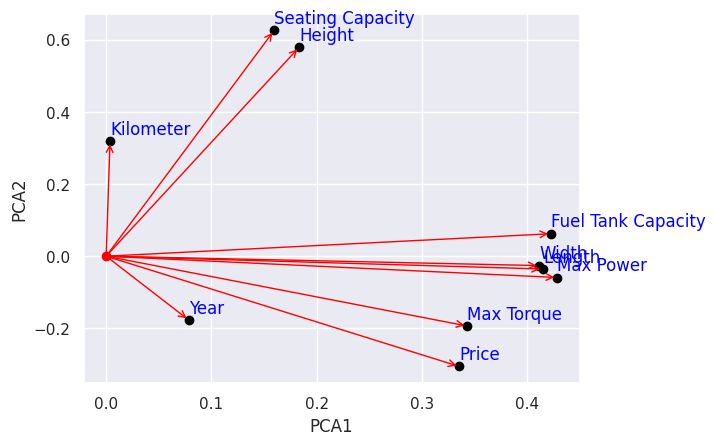

In [39]:
pca_plot(pca2, df2_2)

# EV_CARS _INDIA.csv

In [40]:
print(files[2])
df3 = pd.read_csv('dataset splitup/dataset2/EV_CARS _INDIA.csv')
df3.head()

dataset splitup/dataset2/EV_CARS _INDIA.csv

,Brand Name,Battery Capacity(kWh),Acceleration(sec),TopSpeed(km/h),Range(km),Max Power(kW),Max Torque(Nm),Transmission,No. of Seats,Charging T(h),No. of Airbags,Drive Type,Price(Lh)
0,Audi RS e-tron GT,93.4,3.3,250,480,500,830,Automatic,5,9,Yes,AWD,204
1,Audi e-tron GT,93.4,4.1,245,500,523,630,Automatic,5,9,Yes,AWD,179
2,Audi e-tron,95.0,5.7,200,484,300,664,Automatic,5,9,Yes,AWD,123
3,Tata Nexon EV,30.2,9.9,180,312,96,245,Automatic,5,9,Yes,FWD,17
4,Tata Tigor EV,26.0,5.7,120,306,55,170,Automatic,5,9,Yes,FWD,14


In [41]:
df3.isna().sum().sum()

0

In [42]:
df3['No. of Airbags'].unique()

array(['Yes', 'No'], dtype=object)

# India_Electric_Vehicle_Market_1671628312425_1.csv

In [43]:
print(files[3])
df4 = pd.read_csv(files[3])
df4

dataset splitup/dataset2/India_Electric_Vehicle_Market_1671628312425_1.csv

,Region,Country,Vehicle Type,Body Type,Sub Body Type,Engine Type,Fuel Type,Metric,Units
0,Asia-Pacific,India,Passenger Vehicles,* All,* All,Hybrid and Electric Vehicles,HEV,Volume,Units
1,Asia-Pacific,India,Passenger Vehicles,* All,* All,Hybrid and Electric Vehicles,PHEV,Volume,Units
2,Asia-Pacific,India,Passenger Vehicles,* All,* All,Hybrid and Electric Vehicles,BEV,Volume,Units
3,Asia-Pacific,India,Passenger Vehicles,* All,* All,Hybrid and Electric Vehicles,FCEV,Volume,Units
4,Asia-Pacific,India,Passenger Vehicles,* All,* All,Hybrid and Electric Vehicles,* All,Volume,Units
5,Asia-Pacific,India,Passenger Vehicles,Passenger Cars,Hatchback,Hybrid and Electric Vehicles,* All,Volume,Units
6,Asia-Pacific,India,Passenger Vehicles,Passenger Cars,Sedan,Hybrid and Electric Vehicles,* All,Volume,Units
7,Asia-Pacific,India,Passenger Vehicles,Passenger Cars,Sports Utility Vehicle,Hybrid and Electric Vehicles,* All,Volume,Units
8,Asia-Pacific,India,Passenger Vehicles,Passenger Cars,Multi-purpose Vehicle,Hybrid and Electric Vehicles,* All,Volume,Units
9,Asia-Pacific,India,Commercial Vehicles,* All,* All,Hybrid and Electric Vehicles,* All,Volume,Units


In [44]:
df4.isna().sum().sum()

0

# 2-wheeler-EV-bikewale.csv

In [45]:
print(files[4])
df5 = pd.read_csv(files[4])
df5.head()

dataset splitup/dataset2/2-wheeler-EV-bikewale.csv

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube


In [46]:
df5.isna().sum().sum()

3187

In [47]:
df5.review

0      We all checked the bike's capacity to be 150 k...
1      Performance is very poor on this bike. The cha...
2      I purchased this in April 2022 and the sales s...
3      If any issues come in scooty parts not availab...
4      Don't buy this vehicle unless you have a near ...
                             ...                        
839    Scooty is ok but 250 motor power is less. So t...
840    Superb scooty. good look, Many color options ....
841    Up to 2 years the condition was good,\nAfter 2...
842    Compare to other scooters it is a best bike, c...
843    This bike is good as this segment. can use the...
Name: review, Length: 844, dtype: object

In [48]:
def sentiment(text):
    if type(text) == str:
        blob = textblob.TextBlob(text)
        return blob.sentiment.polarity
    else: return 0

In [49]:
(df5.review.apply(sentiment)).mean()

0.17247112348469865

In [50]:
df5['sentiment'] = df5.review.apply(sentiment)

In [51]:
df5.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,sentiment
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube,0.131250
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube,-0.192143
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube,0.247727
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube,0.080952
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube,-0.093750


In [52]:
df5['Ridden for'] = df5['Ridden for'].replace({np.nan:0, '< 5000 kms':5000, '5000-10000 kms':7500, '> 15000 kms':15000,
       '10000-15000 kms':12500, 'Never owned':0})

In [53]:
df5 = df5.fillna(0)

In [54]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              844 non-null    object 
 1   Used it for         844 non-null    object 
 2   Owned for           844 non-null    object 
 3   Ridden for          844 non-null    int64  
 4   rating              844 non-null    int64  
 5   Visual Appeal       844 non-null    float64
 6   Reliability         844 non-null    float64
 7   Performance         844 non-null    float64
 8   Service Experience  844 non-null    float64
 9   Extra Features      844 non-null    float64
 10  Comfort             844 non-null    float64
 11  Maintenance cost    844 non-null    float64
 12  Value for Money     844 non-null    float64
 13  Model Name          844 non-null    object 
 14  sentiment           844 non-null    float64
dtypes: float64(9), int64(2), object(4)
memory usage: 99.0+ KB

In [55]:
df5.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,sentiment
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,0,1,3.0,4.0,0.0,0.0,0.0,4.0,0.0,1.0,TVS iQube,0.131250
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,5000,1,3.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,TVS iQube,-0.192143
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,5000,3,4.0,4.0,0.0,2.0,0.0,5.0,0.0,2.0,TVS iQube,0.247727
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,7500,1,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,TVS iQube,0.080952
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,5000,1,3.0,4.0,0.0,1.0,0.0,3.0,0.0,2.0,TVS iQube,-0.093750


In [56]:
df5_numeric = df5.select_dtypes(['float', 'int'])
df5_numeric.head()

,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,sentiment
0,0,1,3.0,4.0,0.0,0.0,0.0,4.0,0.0,1.0,0.131250
1,5000,1,3.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,-0.192143
2,5000,3,4.0,4.0,0.0,2.0,0.0,5.0,0.0,2.0,0.247727
3,7500,1,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.080952
4,5000,1,3.0,4.0,0.0,1.0,0.0,3.0,0.0,2.0,-0.093750


In [57]:
df5_numeric.shape

(844, 11)

In [58]:
pca3 = PCA(n_components=11)
df5_numeric_pca = pca3.fit_transform(df5_numeric)
df5_numeric_pca[:5]

array([[-5.09478640e+03,  1.57895971e+00, -2.37559663e+00,
         7.10846194e-01, -2.31221188e+00,  8.83832566e-01,
        -2.20355868e+00, -1.17549230e+00,  9.50159161e-01,
         1.24147132e+00,  2.63160832e-01],
       [-9.47862637e+01,  1.78523774e+00, -3.00159072e+00,
        -2.47016616e-01, -1.83166350e+00,  7.02699483e-01,
         5.99162224e-01, -6.99619389e-01, -6.44838195e-01,
         7.19584931e-02, -7.10246006e-02],
       [-9.47867780e+01, -1.66351102e+00, -2.20235883e+00,
         7.48821253e-01, -9.11920631e-01,  6.10591260e-01,
        -7.89786776e-01, -8.27536523e-01,  1.06030581e+00,
         1.02974941e+00,  1.39499095e-01],
       [ 2.40521381e+03,  3.89492985e+00, -1.73171211e+00,
         1.02746254e-01, -5.32441297e-01, -7.76133515e-01,
        -3.19208957e-01,  2.54534406e-02, -2.02738853e-01,
         6.85067022e-02,  1.84883008e-01],
       [-9.47864171e+01,  7.54018617e-01, -2.07147461e+00,
         7.76271792e-02, -2.01468037e+00,  3.41742471e-01,
  

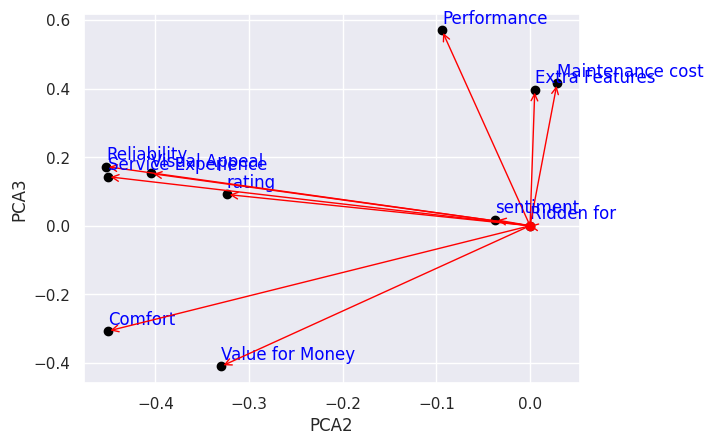

In [59]:
pca_plot(pca3, df5_numeric, 1, 2)

# CAR DETAILS FROM CAR DEKHO.csv

In [60]:
print(files[5])
df6 = pd.read_csv(files[5])
df6.head()

dataset splitup/dataset2/CAR DETAILS FROM CAR DEKHO.csv

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [61]:
df6.isna().sum().sum()

0

In [62]:
df6.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [63]:
df6_1 = df6[df6.fuel != 'Electric']

In [64]:
df6_1 = df6_1.select_dtypes(['float', 'int']).groupby('year').sum().reset_index()
df6_1.head()

,year,selling_price,km_driven
0,1992,50000,100000
1,1995,95000,100000
2,1996,450000,95000
3,1997,279000,270000
4,1998,2568000,775000


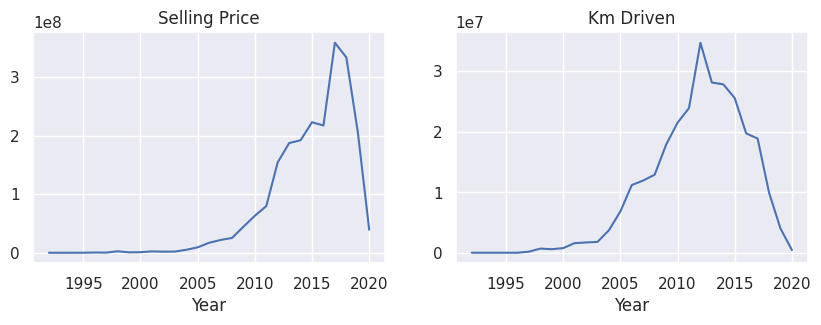

In [65]:
fig, axs = plt.subplots(1,2, figsize=(10, 3))
axs[0].plot(df6_1.year, df6_1.selling_price)
axs[0].set_title('Selling Price')
axs[0].set_xlabel('Year')
axs[1].plot(df6_1.year, df6_1.km_driven)
axs[1].set_title('Km Driven')
axs[1].set_xlabel('Year')
plt.show()

In [66]:
df6_2 = df6[df6.fuel == 'Electric']
df6_2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4145,Toyota Camry Hybrid,2006,310000,62000,Electric,Dealer,Automatic,Second Owner


In [67]:
df6.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [68]:
df6.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [69]:
df6.owner.unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

# Electric Car.csv

In [70]:
print(files[6])
df7 = pd.read_csv(files[6])
df7.head()

dataset splitup/dataset2/Electric Car.csv

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [71]:
df7.isna().sum().sum()

0

In [72]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [73]:
df7 = df7[df7.FastCharge_KmH != '-']
df7.FastCharge_KmH = df7.FastCharge_KmH.astype(int)

In [74]:
df7_1 = df7.select_dtypes(['float', 'int'])
df7_1.head()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
0,4.6,233,450,161,940,5,55480
1,10.0,160,270,167,250,5,30000
2,4.7,210,400,181,620,5,56440
3,6.8,180,360,206,560,5,68040
4,9.5,145,170,168,190,4,32997


In [75]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x, y = scaler_x.fit_transform(df7_1.drop('PriceEuro', axis=1)), scaler_y.fit_transform(df7_1.PriceEuro.values.reshape(-1, 1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

for i in [x_train, x_test, y_train, y_test]:
    print(i.shape)

(78, 6)

(20, 6)

(78, 1)

(20, 1)

In [76]:
Lr = LinearRegression()
Lr.fit(x_train, y_train)
Lr.score(x_train, y_train)

0.7714756606431552

In [77]:
Lr.score(x_test, y_test)

0.4627381577569434

In [78]:
Dt = DecisionTreeRegressor()
Dt.fit(x_train, y_train)
Dt.score(x_train, y_train)

0.9998444885627737

In [79]:
Dt.score(x_test, y_test)

0.7937733360828481

In [80]:
svr = SVR()
svr.fit(x_train, y_train)
print(svr.score(x_train, y_train))
print(svr.score(x_test, y_test))

0.8138103675047363

0.7462464045069448

In [81]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

0.9588211327899486

0.636329738412679

In [82]:
model = Sequential([
    Dense(4, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [83]:
model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test, y_test)

Epoch 1/10
3/3 [==============================] - 1s 4ms/step - loss: 1.3695 - accuracy: 0.0000e+00
Epoch 2/10
3/3 [==============================] - 0s 3ms/step - loss: 1.3287 - accuracy: 0.0000e+00
Epoch 3/10
3/3 [==============================] - 0s 4ms/step - loss: 1.3461 - accuracy: 0.0000e+00
Epoch 4/10
3/3 [==============================] - 0s 4ms/step - loss: 1.3422 - accuracy: 0.0000e+00
Epoch 5/10
3/3 [==============================] - 0s 4ms/step - loss: 1.3352 - accuracy: 0.0000e+00
Epoch 6/10
3/3 [==============================] - 0s 4ms/step - loss: 1.3171 - accuracy: 0.0000e+00
Epoch 7/10
3/3 [==============================] - 0s 4ms/step - loss: 1.2940 - accuracy: 0.0000e+00
Epoch 8/10
3/3 [==============================] - 0s 4ms/step - loss: 1.3199 - accuracy: 0.0000e+00
Epoch 9/10
3/3 [==============================] - 0s 3ms/step - loss: 1.2991 - accuracy: 0.0000e+00
Epoch 10/10
1/1 [==============================] - 0s 151ms/step - loss: 1.2330 - accuracy: 0.0000e+

[1.2329775094985962, 0.0]

> SVR gives very good score

In [84]:
df7_1.columns

Index(['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm',
       'FastCharge_KmH', 'Seats', 'PriceEuro'],
      dtype='object')

In [85]:
car_model = SVR()
car_model.fit(x, y)

if not os.path.exists('model'):
    os.mkdir('model')

with open('model/car_model.pkl', 'wb') as f:
    pickle.dump(car_model, f)

with open('model/scaler_x.pkl', 'wb') as f:
    pickle.dump(scaler_x, f)

with open('model/scaler_y.pkl', 'wb') as f:
    pickle.dump(scaler_y, f)

## Car Price prediction model

In [86]:
with open('model/car_model.pkl', 'rb') as f:
    car_model = pickle.load(f)

with open('model/scaler_x.pkl', 'rb') as f:
    scaler_x = pickle.load(f)

with open('model/scaler_y.pkl', 'rb') as f:
    scaler_y = pickle.load(f)

def car_price(AccelSec, TopSpeed_KmH, Range_Km, 
              Efficiency_WhKm, FastCharge_KmH, Seats):
    'This function gets AccelSec, TopSpeed_KmH, Range_Km, Efficiency_WhKm\
, FastCharge_KmH and Seats of car. It returns price of car in rupees'
    x = scaler_x.transform([[AccelSec, TopSpeed_KmH, Range_Km, 
                            Efficiency_WhKm, FastCharge_KmH, Seats]])
    y = car_model.predict(x)
    y = scaler_y.inverse_transform(y.reshape(1, -1))
    return y[0][0]*88.8

In [87]:
sample = df7_1.iloc[0].tolist() # sample data
print(sample)
price = car_price(*sample[:-1]) # we should get near 55480.0
print(f'Price = €{round(price/88.8):,} and ₹{round(price):,}')

[4.6, 233.0, 450.0, 161.0, 940.0, 5.0, 55480.0]

Price = €57,004 and ₹5,061,992

In [88]:
sample = df7_1.iloc[1].tolist() # sample data
print(sample)
price = car_price(*sample[:-1]) # we should get near 30000.0
print(f'Price = €{round(price/88.8):,} and ₹{round(price):,}')

[10.0, 160.0, 270.0, 167.0, 250.0, 5.0, 30000.0]

Price = €32,642 and ₹2,898,624

# RS_Session_255_AU_749.C.csv

In [89]:
print(files[7])
df8 = pd.read_csv(files[7])
df8

dataset splitup/dataset2/RS_Session_255_AU_749.C.csv

,Sl. No.,Year,Number of Electric Vehicles
0,1,2019,161314
1,2,2020,119648
2,Total,Total,280962


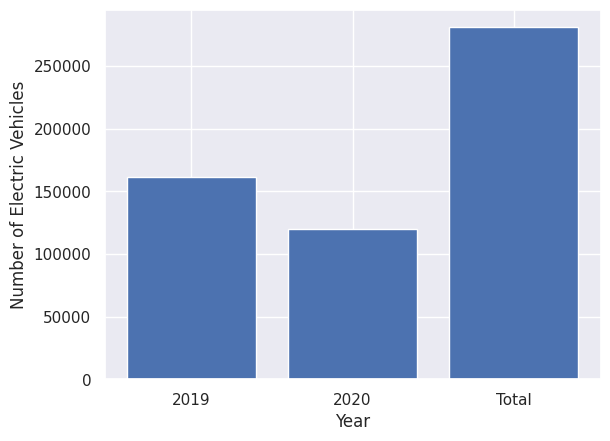

In [90]:
plt.bar(df8.Year, df8['Number of Electric Vehicles'])
plt.xlabel('Year')
plt.ylabel('Number of Electric Vehicles')
plt.show()

# cars.csv

In [91]:
print(files[8])
df9 = pd.read_csv(files[8], delimiter=';')
df9.head()

dataset splitup/dataset2/cars.csv

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT,CAT
1,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,US
3,Plymouth Satellite,18.0,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,304.0,150.0,3433.,12.0,70,US


In [92]:
df9 = df9.drop(0)
df9.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
1,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,US
3,Plymouth Satellite,18.0,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,304.0,150.0,3433.,12.0,70,US
5,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US


In [93]:
df9.isna().sum().sum()

0

In [94]:
df9.Origin.unique()

array(['US', 'Europe', 'Japan'], dtype=object)

> This dataset doesn't have India data

In [95]:
df9.Model.unique()

array(['70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80',
       '81', '82'], dtype=object)

In [96]:
df9.Cylinders.unique()

array(['8', '4', '6', '3', '5'], dtype=object)

In [97]:
df9.columns

Index(['Car', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model', 'Origin'],
      dtype='object')

In [98]:
df9_1 = df9[['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration']]

In [99]:
scaler = StandardScaler()

df9_scaled = scaler.fit_transform(df9_1)

pca4 = PCA()
df9_pca = pca4.fit_transform(df9_scaled)

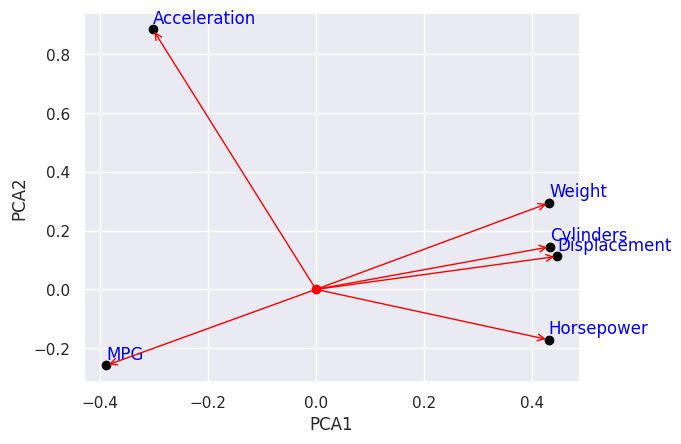

In [100]:
pca_plot(pca4, df9_1, 0, 1)

# FEV data.csv

In [101]:
print(files[9])
df10 = pd.read_csv(files[9])
df10.head()

dataset splitup/dataset2/FEV data.csv

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [102]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Car full name                           53 non-null     object 
 1   Make                                    53 non-null     object 
 2   Model                                   53 non-null     object 
 3   Minimal price (gross) [PLN]             53 non-null     int64  
 4   Engine power [KM]                       53 non-null     int64  
 5   Maximum torque [Nm]                     53 non-null     int64  
 6   Type of brakes                          52 non-null     object 
 7   Drive type                              53 non-null     object 
 8   Battery capacity [kWh]                  53 non-null     float64
 9   Range (WLTP) [km]                       53 non-null     int64  
 10  Wheelbase [cm]                          53 non-null     float64


In [103]:
df10 = df10.dropna()

In [104]:
df10_1 = df10.select_dtypes(['float', 'int'])

In [105]:
scaler = StandardScaler()

df10_scaled = scaler.fit_transform(df10_1)

pca5 = PCA()
df10_pca = pca5.fit_transform(df10_scaled)

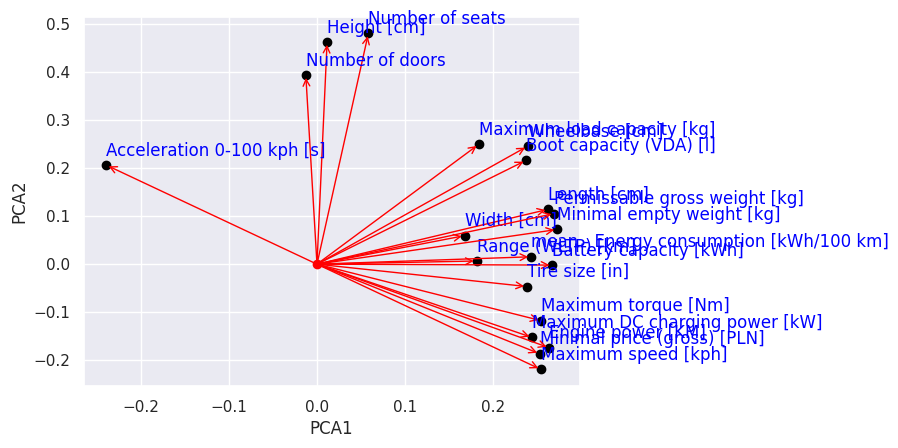

In [106]:
pca_plot(pca5, df10_1, 0, 1)